Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory

## Trabalho 2.2 Análise dinâmica de modelo estrutural com múltiplos graus de liberdade - resposta a um impacto

---
#### Aluna : Gabriela Grützmacher Machado
#### Matrícula: 00312129

_Porto Alegre, RS, Brazil_ 


In [115]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc




## 1 Frequências naturais e modos de vibração

   No presente trabalho utilizou-se a estrutura de um pórtico em concreto armado, dados de propriedade da seção transversal dos elementos de barras da estrutura e propriedades do material conforme tabela abaixo. 

<img src="data2/tabela1.png" alt="tabela1" width="250px"/>

   A estrutura consta com uma área em planta de 15m² (5 x 3m) e altura de 50 m, foi dividida por 10 nós ativos na seção vertical, o espaçamento entre nós é de 5m. 
   <img src="data2/portico.png" alt="portico" width="200px"/>
O processo de cálculo para se determinar a frêquencia natural e posteriormente o modo de vibração consiste no carregamento nos nós da estrutura, no sentido de cima para baixo tomando-se nota dos deslocamentos em x de todos os nós correspondentes as aplicações nó por nó. Os nós da estrutura aorticada estão separados um do outro por 5m. Esse processo pode ser analisado na próxima figura, a partir da aplicação de uma carga unitária mede-se o deslocamento em todos os nós, assim sucessivamente, medindo-se os deslocamentos, aplicando a carga unitária em todos os nós. 
<img src="data2/portico2.png" alt="portico2" width="400px"/>
Os resultados dos deslocamentos encontrados foram divididos pela carga aplicada, posteriormente organizaou-se os valores em colunas resultanto em uma matriz 10x10 (nº nós atribuídos na barra do pórtico), denominada matriz de flexibilidade. 
A matriz de flexibilidade  $ {H} $ deve ser simétrica como declarado pelo teorema da reciprocidade de Maxwell-Betti. Segue a baixo a matriz de flexibilidade  $ {H} $ em m/N.

In [8]:
# Flexibility coefficients in m/N
H1 = np.array([[9.516, 8.539, 7.452, 6.363, 5.294, 4.251, 3.241, 2.2771, 1.352, 0.5184], 
               [8.539, 8.120, 7.220, 6.199, 5.174, 4.167, 3.187, 2.241, 1.339, 0.5151], 
               [7.452, 7.220, 6.860, 6.017, 5.052, 4.084, 3.134, 2.211, 1.325, 0.5118], 
               [6.364, 6.198, 6.017, 5.707, 4.914, 3.999, 3.081, 2.181, 1.312, 0.5085], 
               [5.294, 5.174, 5.051, 4.912, 4.647, 3.897, 3.025, 2.151, 1.299, 0.5051],
               [4.251, 4.167, 4.084, 3.998, 3.897, 3.666, 2.953, 2.119, 1.285, 0.5018],
               [3.241, 3.187, 3.134, 3.081, 3.025, 2.953, 2.753, 2.070, 1.296, 0.4982],
               [2.271, 2.239, 2.211, 2.181, 2.151, 2.119, 2.070, 1.894, 1.238, 0.4931],
               [1.352, 1.338, 1.325, 1.312, 1.299, 1.285, 1.269, 1.238, 1.083, 0.4754],
               [0.5184, 0.5151, 0.5118, 0.5074, 0.5046, 0.5018, 0.4982, 0.4929, 0.4757, 0.3593]])*1e-6  


Posteriormente, para calcular os modos de vibração da estrutura é necessário multiplicar uma matriz de rigidez por uma matriz de massa, com isso para se determinar a matriz de rigidez da presente estrutura foi necessário se determinar a inversa da matriz de flexibilidade que é a matriz de rigidez  $ {k} $.

In [9]:
# Stiffness coefficients in N/m
K1 = np.linalg.inv(H1) 

Para se determinar a massa da estrutura, considerou-se um peso de 400 kg/m³, resultando em uma massa por pavimento de 30.000,00 Kg.
Cada massa nodal gera uma força inercial sempre que ocorre uma aceleração no grau de liberdade correspondente. A seguir a matriz de massa $ {M} $.

In [99]:
# Lumped mass matrix in kg
M1 = np.array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 3, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 3, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]])*1e4



A determinação da frequência fundamental foi realizada através do Python, a partir da matriz inversa de rigidez e matriz de massa foi possível plotar o valor de menor Wk que é a frequência natural, a partir desse valor foi possível realizar o cálculo para determinação da frequência fundamental.
        $Wᴋ^2=0.8762 rad/s$     e         $fk=W/2π=√0.8762/2π=0,15 Hz$
 

In [100]:
w2, phi = sc.eig(K1, M1)

print (w2)

print(phi1)

[479.3976481 +0.j 401.81053281+0.j 363.78136615+0.j 257.74311619+0.j
 171.13211886+0.j 107.88358664+0.j  59.24635984+0.j  27.51310474+0.j
   0.87622933+0.j   8.52048869+0.j]
[[ 0.08088678 -0.00924577  0.11617667 -0.22771306  0.27337643 -0.3277263
   0.37990101 -0.41277217 -0.4703065   0.44054348]
 [-0.23969592  0.03919253 -0.29168285  0.4405113  -0.37483094  0.24122749
  -0.06103236 -0.14697911 -0.44701913  0.31792527]
 [ 0.36668598 -0.07179657  0.29102747 -0.14452272 -0.16819004  0.40083479
  -0.41792738  0.18647847 -0.41516368  0.13893176]
 [-0.43735863  0.07671833 -0.10333839 -0.32837421  0.4139181  -0.09771503
  -0.33298251  0.41134618 -0.37517886 -0.06399829]
 [ 0.44497081 -0.04822029 -0.15046396  0.41543359  0.08302415 -0.43958788
   0.10424086  0.40203269 -0.32801507 -0.25119246]
 [-0.39118672 -0.01082146  0.3060923  -0.01890224 -0.4237153  -0.06650652
   0.43299701  0.16621434 -0.27500092 -0.38620513]
 [ 0.32017548  0.17463138 -0.18593674 -0.37979699 -0.00661675  0.39135651
   

Para a menor frequência o auto vetor correspondente ao modo de vibração:  

ϕ [-0.4703, -0.4470, -0.4152, -0,3752, -0.3280, -0.2750, -0.2176, -0.1572, -0.0959, -0.0375]


Os quatro primeiros modos de vibração da estrutura estão definidos a baixo:

In [101]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw = w21.argsort()
w21 = w21[iw]
Phi1 = Phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1 = np.sqrt(np.real(w21))
fk1 = wk1/2/np.pi


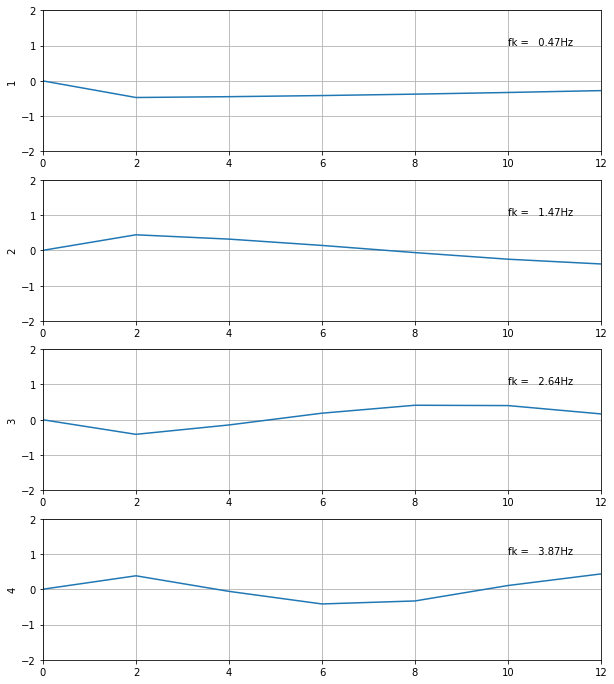

In [96]:
# Visualization of vibration modes
plt.figure(1, figsize=(10,40))
x = np.arange(0,24,2)

for k in range(4):
    pk = np.zeros(12)
    pk[1:-1] = Phi1[:,k]
    pm = np.max(np.abs(pk)) # only for plotting, unity normalization

    plt.subplot(13,1,k+1)
    plt.plot(x, pk)

    plt.xlim( 0.0, 12.0);
    plt.ylim(-2,  2);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)
    

## 2 Cálculo de parâmetros zeta e deslocamento máximo para a velocidade no nó de topo.

Vetor da velocidade inicial:

In [108]:
fmax = np.max(fk1)
print(fmax)
F = 30000
Tn = 1/fmax
td = Tn/4
m = 30000
v0 = (F*td)/m
print(v0)

v0_v = [v0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
u0_v = np.zeros(10)

3.484721550615354
0.07174174359952905


Deslocamento no nó de topo:

-2.4775167996094476


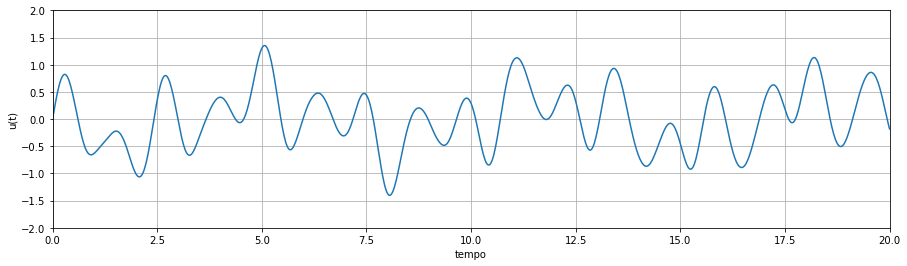

In [114]:

    
Phit = Phi1.transpose()   
xi = np.pi/2
UMAX = np.zeros(10)
    
for k in range (10):
    Mi = np.dot(np.dot(Phit[k], M1), phi[k])
    umax = (np.dot(np.dot(Phit[k], M1),v0_v)) / (wk1[k]*np.sin(xi)*Mi)
    
    UMAX[k] = umax
    
t = np.linspace(0,20,1000)
uk = np.zeros((10,1000))

for k in range(10):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(phi, uk)
print(UMAX[0])

plt.figure(2, figsize=(15,4))
plt.plot(t,u[9,:])
plt.xlim(0.0, 20.0); plt.xlabel('tempo');
plt.ylim(-2, 2); plt.ylabel('u(t)');
plt.grid(True)



### 3 Amortecimento

A resultante de amortecimento foi calculada a partir das matrizes de rigidez e massa:


In [83]:
zeta = np.zeros(10)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (8):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print(zeta)

[0.01       0.01       0.01117715 0.01831107 0.02571634 0.03295999
 0.04085133 0.04880736 0.05136153 0.05621397]
